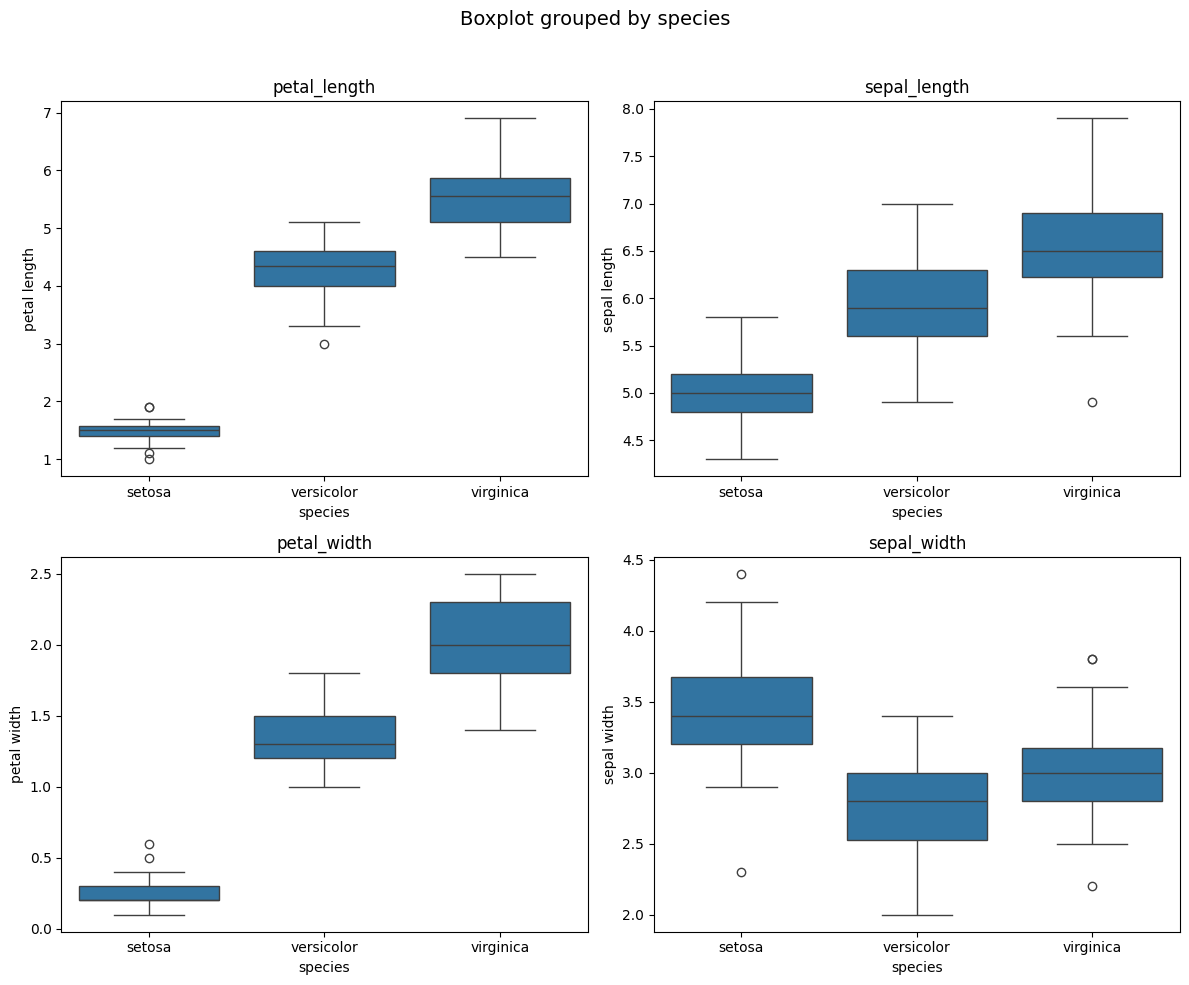

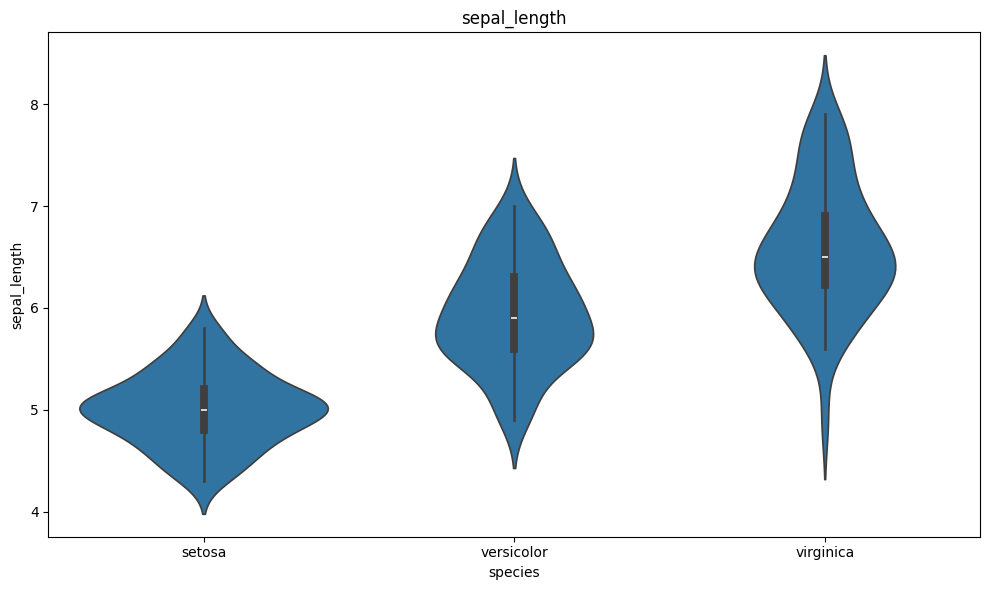

In [2]:
# === Buổi 4 - Iris plots: Boxplot + Violin ===
import os
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Nạp dữ liệu: ưu tiên file Iris.csv, nếu không có -> dùng sklearn (offline)
path_csv = "../Lab_MidTerm/Iris.csv"  # chỉnh đường dẫn nếu bạn để chỗ khác
if os.path.exists(path_csv):
    df = pd.read_csv(path_csv)
    # Chuẩn hoá tên cột cho giống ví dụ của thầy/bạn bạn
    rename_map = {
        "SepalLengthCm":"sepal_length",
        "SepalWidthCm":"sepal_width",
        "PetalLengthCm":"petal_length",
        "PetalWidthCm":"petal_width",
        "Species":"species",
    }
    df = df.rename(columns={k:v for k,v in rename_map.items() if k in df.columns})
else:
    from sklearn.datasets import load_iris
    data = load_iris(as_frame=True)
    df = data.frame
    df.columns = ["sepal_length","sepal_width","petal_length","petal_width","species"]
    # sklearn species là số -> đổi thành tên
    species_names = np.array(["setosa","versicolor","virginica"])
    df["species"] = species_names[df["species"].astype(int).values]

# Đảm bảo thư mục lưu ảnh
os.makedirs("Jeep", exist_ok=True)
order = ["setosa","versicolor","virginica"]  # thứ tự nhóm cho đẹp

# 2) Grid 4 boxplot theo species
features = ["petal_length","sepal_length","petal_width","sepal_width"]
fig, axes = plt.subplots(2, 2, figsize=(12,10))
fig.suptitle("Boxplot grouped by species", fontsize=14)

for ax, col in zip(axes.ravel(), features):
    sns.boxplot(data=df, x="species", y=col, order=order, ax=ax)
    ax.set_title(col)
    ax.set_xlabel("species"); ax.set_ylabel(col.replace("_"," "))

plt.tight_layout(rect=[0,0,1,0.96])
fig.savefig("Jeep/a.png", dpi=150)   # giống tên ảnh của bạn bạn
plt.show()

# 3) Violin plot sepal_length theo species
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="species", y="sepal_length", order=order, inner="box")
plt.xlabel("species"); plt.ylabel("sepal_length")
plt.title("sepal_length")
plt.tight_layout()
plt.savefig("Jeep/b.png", dpi=150)
plt.show()
